In [ ]:
# Linear Regression
#               X: age of cars                 y: Speed of cars

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

In [ ]:
slope, intercept,r ,p , std_err = stats.linregress(x, y)

In [ ]:
def myfunc(x):
  return slope * x + intercept

In [ ]:
mymodel = list(map(myfunc, x))

98.72774098601913


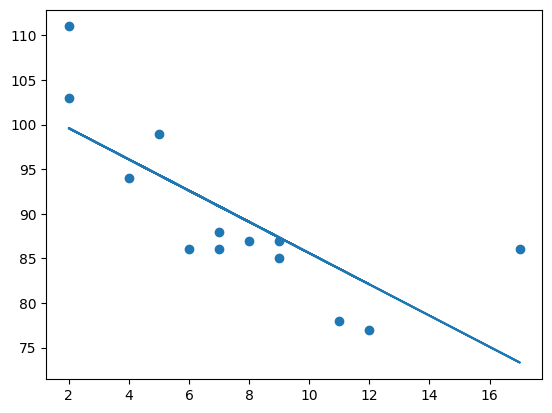

In [ ]:
print(myfunc(2.5))
plt.scatter(x, y)
plt.plot(x, mymodel)

In [ ]:
# R for Relationship between 'y' AND 'mymodel'

In [ ]:
print(r)

-0.758591524376155


In [ ]:
# Predict Future Values

In [ ]:
speed = myfunc(10)

In [ ]:
print(speed)

85.59308314937454


In [ ]:
# //////////////////////////////////////////////////////////////////////////////

In [ ]:
# Logestic Regression

# X: size of tumor           Y: represents whether or not the tumor is cancerous (0 for "No", 1 for "Yes").

In [ ]:
import numpy
from sklearn import linear_model
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
logr = linear_model.LogisticRegression()
logr.fit(X,y)
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print('تومور با اندازه داده شده سرطانی هست یا نه',predicted)
# logr.coef_ : شیب خط
log_odds = logr.coef_
# برای تبدیل لوگ آدس به آدس از اکسپوننشیال استفاده میکنیم
# To  convert the log-odds to odds we must exponentiate the log-odds.
odds = numpy.exp(log_odds)
# odds: شانس سرطانی بودن یک تومور هنگامی که اندازه یک تومور یک میلیمتر افزایش میابد چندبرابر میشود.یعنی آدس میگوید شانس چندبرابر شده است
print('افزایش شانس سرطانی بودن تومور به ازای افزایش یک میلی متر در اندازه تومور:',odds)
#///////////////////////////////////////////////////////////////////////

def logit2prob(logr, X):
  log_odds = logr.coef_ * X + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

print('شانس سرطانی بودن هر تومور:',logit2prob(logr, X))

تومور با اندازه داده شده سرطانی هست یا نه [0]
افزایش شانس سرطانی بودن تومور به ازای افزایش یک میلی متر در اندازه تومور: [[4.03541657]]
شانس سرطانی بودن هر تومور: [[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]


In [ ]:
# this means: for example: The probability that a tumor with the size 3.78cm is cancerous is 61%.

In [ ]:
# //////////////////////////////////////////////////////////

In [ ]:
#               Polynomial Regression

In [ ]:
#          x: elapsed time of car               y: Speed of cars

In [ ]:
import numpy
import matplotlib.pyplot as plt

          3         2
-0.03032 x + 1.343 x - 15.54 x + 113.8


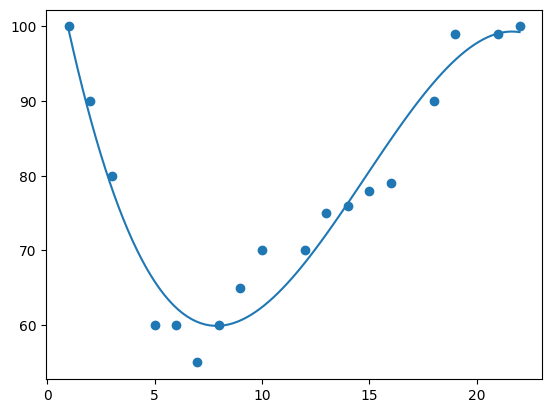

In [ ]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))
myline = numpy.linspace(1, 22, 100)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
print(mymodel)
#plt.show()

In [ ]:
#

In [ ]:
mymodel(x)

array([99.54274393, 87.82218964, 78.42444862, 65.86970529, 62.34885243,
       60.42311173, 59.91055791, 60.6292657 , 62.39730983, 68.35370596,
       72.17820742, 76.32434409, 80.61019072, 84.85382201, 92.4867375 ,
       95.51217113, 99.07136381, 99.24127229])

In [ ]:
# R-Squared      for Relationship between 'y' AND 'mymodel'

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y, mymodel(x)))

0.9432150416451026


In [ ]:
# Predict Future Values

In [ ]:
speed = mymodel(6)
print(speed)

62.348852427735636


In [ ]:
#////////////////////////////////////////////////////////////////////

In [ ]:
#               Multiple Regression

In [ ]:
from google.colab import files

In [ ]:
import pandas

In [ ]:
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df = pandas.read_csv("data.csv")

In [ ]:
X = df[['Weight', 'Volume']]
y = df['CO2']

In [ ]:
from sklearn import linear_model

In [ ]:
#  From the sklearn module we will use the LinearRegression() method to create a linear regression object.
# This object has a method called fit() that takes the independent and dependent values as parameters and...
# fills the regression object with data that describes the relationship:
#

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [ ]:
#  Now we have a regression object that are ready to predict CO2 values based on a car's weight and volume:

In [ ]:
#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3
predictedCO2 = regr.predict([[2300, 1300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(predictedCO2)

[107.2087328]


In [ ]:
#  In this case, we can ask for the coefficient value of weight against CO2, and for volume against CO2.
# The answer(s) we get tells us what would happen if we increase, or decrease, one of the independent values.

In [ ]:
print(regr.coef_)

[0.00755095 0.00780526]
